In [ ]:
import pandas as pd
import numpy as np
import random
from random import choices
from collections import Counter
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats

random.seed(1)

# old! df = pd.read_csv("/Users/jacob/Downloads/June 2024 Transposed Ready Function SEED Representative 20240725 for plots.csv")
df = pd.read_csv("/Users/jacob/Downloads/June 2024 Transposed Ready Function SEED Representative 20240725 for plots (1).csv")
# old ! observed = pd.read_csv("/Users/jacob/Downloads/Rho and stats for colour plot 20240801.csv", index_col="Gene")
observed = pd.read_csv("/Users/jacob/Downloads/June 2024 Transposed Ready Function SEED Representative 20240725.csv", index_col="Site")

/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
df

,Site,Percent Temperate Hallmark,Integrases,Gene,Gene Frequency
0,Car9_R1_done,0.655134,0.370892,EC 1.1.1.37,0.111268
1,CWS09R1MGRAST,0.833938,0.403670,EC 1.1.1.37,0.000000
2,FFS42_R1_done,0.774086,0.562605,EC 1.1.1.37,0.011970
3,FFSNCRMPI_R1_done,0.658328,0.345614,EC 1.1.1.37,0.036767
4,Flint_R1_done,0.792631,0.740418,EC 1.1.1.37,0.000000
...,...,...,...,...,...
660,OAH1540_R1_done,0.451314,0.312411,5.4.2.11 pgm,0.062019
661,PHR54_R1_done,0.759021,0.304223,5.4.2.11 pgm,0.029414
662,PHRwreckR1MGRAST,0.685577,0.550549,5.4.2.11 pgm,0.015852
663,Star7_R1_done,0.688099,0.416385,5.4.2.11 pgm,0.018854


In [5]:
observed

,Percent Temperate Hallmark,Integrases,EC 1.1.1.37,EC 1.1.1.41 Pooled,EC 1.1.1.42,EC 1.1.1.44,EC 1.1.1.49 Pooled,EC 1.2.1.12 Pooled,EC 1.2.4.1 Pooled,EC 1.2.4.2,...,EC 4.2.1.2,EC 4.2.1.3,EC 5.1.3.1,EC 5.3.1.1,EC 5.3.1.6 Pooled,EC 5.3.1.9,EC 6.2.1.5a Pooled,EC 6.2.1.5b Pooled,5.4.2.12 bpg_ind,5.4.2.11 pgm
Site,,,,,,,,,,,,,,,,,,,,,
LIS54_R1_done,0.568236,0.266185,0.038026,0.000000,0.085559,0.076053,0.152106,0.066546,0.066546,0.180626,...,0.038026,0.076053,0.038026,0.066546,0.057040,0.038026,0.142599,0.066546,0.047533,0.114079
KAU1435_R1_done,0.689819,0.558169,0.055817,0.000000,0.111634,0.047843,0.111634,0.047843,0.199346,0.095686,...,0.063791,0.039869,0.047843,0.015948,0.039869,0.087712,0.119608,0.031895,0.063791,0.047843
LAN1269_R1_done,0.741840,0.378939,0.129637,0.059832,0.239330,0.000000,0.099721,0.129637,0.299162,0.209414,...,0.149581,0.049860,0.069805,0.059832,0.019944,0.049860,0.069805,0.219386,0.019944,0.039888
Malden_R1_done,0.671850,0.460030,0.037707,0.015083,0.075415,0.015083,0.135747,0.060332,0.120664,0.075415,...,0.105581,0.090498,0.030166,0.037707,0.037707,0.120664,0.037707,0.090498,0.075415,0.015083
Flint_R1_done,0.792631,0.740418,0.000000,0.000000,0.087108,0.021777,0.152439,0.021777,0.108885,0.152439,...,0.174216,0.000000,0.108885,0.065331,0.087108,0.043554,0.087108,0.174216,0.108885,0.000000
Star7_R1_done,0.688099,0.416385,0.078776,0.000000,0.123790,0.000000,0.056268,0.045015,0.090029,0.090029,...,0.168805,0.067522,0.045015,0.101283,0.022507,0.011254,0.157551,0.011254,0.033761,0.000000
FFS42_R1_done,0.774086,0.562605,0.011970,0.000000,0.047881,0.011970,0.179555,0.119703,0.119703,0.131673,...,0.071822,0.059852,0.023941,0.071822,0.047881,0.095763,0.095763,0.083792,0.071822,0.000000
HAW1540_R1_done,0.556122,0.381644,0.111701,0.000000,0.214093,0.000000,0.130317,0.111701,0.335102,0.242018,...,0.055850,0.037234,0.074467,0.027925,0.083775,0.055850,0.158243,0.139626,0.111701,0.074467
NII1303_R1_done,0.762156,0.650803,0.035591,0.000000,0.096604,0.015253,0.152532,0.106772,0.172870,0.132194,...,0.076266,0.020338,0.030506,0.035591,0.066097,0.086435,0.081350,0.045760,0.081350,0.000000


plot the true rho between integrases and each gene

In [ ]:
filtered = observed.drop(["Percent Temperate Hallmark", "Integrases"], axis = 1)
filtered.loc["rho"] = 0

In [ ]:
integrases = list(observed["Integrases"])
#dictionary = {}

[0.266184999,
 0.558169205,
 0.378938971,
 0.460030166,
 0.740418118,
 0.416385325,
 0.56260474,
 0.381643861,
 0.650803335,
 0.312411246,
 0.30422261,
 0.370892367,
 0.573639274,
 0.388898709,
 0.589183825,
 0.345613648,
 0.491400491,
 0.550548664,
 0.403669725]

In [ ]:
for gene in filtered.columns:
    # Calculate the Spearman correlation between the gene column and the list `rho`
    correlation, _ = stats.spearmanr(filtered[gene].iloc[:19], integrases)
    # Assign the correlation value to the "rho" row for the current gene
    filtered.at["rho", gene] = correlation

In [ ]:
dic = {}

for gene in set(df["Gene"]):
    sub = df[df["Gene"] == gene]
    dic[gene] = sub

rho = {key: [] for key in dic.keys()}

iterations = 1000
for key in dic.keys():
    data = dic[key]
    index = list(data.index)
    for i in range(iterations):
        sample = choices(index, k = len(index))
        new = data.loc[sample]
        list1 = new["Integrases"]
        list2 = new["Gene Frequency"]
        rho_val = np.corrcoef(list1, list2)[0,1]
        rho[key].append(rho_val)


In [15]:
from matplotlib import pyplot as plt

In [17]:
means = {key: [np.mean(rho[key])] for key in dic.keys()}

for key in means.keys():
    means[key].append(filtered.at["rho", key])
    means[key].append(np.percentile(rho[key], 2.5))
    means[key].append(np.percentile(rho[key], 97.5))    


In [18]:
final = pd.DataFrame(means, index=["Simulated Mean", "Observed Mean", "Lower Bound", "Upper Bound"])

final.to_csv("/Users/jacob/Desktop/Research/Knowles/Meena Bootstrap/Coral Reef Bootstrap Data.csv")

In [19]:
final

,5.4.2.11 pgm,EC 4.1.2.13 II Pooled,EC 4.2.1.3,EC 4.1.1.32,EC 5.3.1.1,EC 1.1.1.41 Pooled,EC 4.1.2.13 I Pooled,EC 3.1.1.31 Pooled,EC 2.7.1.11,EC 2.2.1.2,...,EC 4.1.3.1,EC 4.2.1.12,5.4.2.12 bpg_ind,EC 4.2.1.11 Pooled,EC 1.1.1.42,EC 2.7.1.40 Pooled,EC 5.3.1.6 Pooled,EC 1.1.1.37,EC 2.3.3.1 Pooled,EC 4.2.1.2
Simulated Mean,-0.303858,0.366184,-0.437517,-0.005525,-0.062296,-0.099617,-0.164947,0.480362,-0.098202,-0.447006,...,-0.171394,0.731192,0.196077,0.439947,-0.207433,0.463617,0.332095,-0.121868,0.003071,0.300614
Observed Mean,-0.482018,0.578947,-0.352786,0.090391,-0.021053,-0.140958,-0.670175,0.448649,-0.035243,-0.487719,...,-0.110575,0.746819,0.428070,0.447368,-0.191228,0.456140,0.342105,-0.193067,0.164912,0.291228
Lower Bound,-0.649398,-0.330460,-0.767350,-0.451741,-0.449208,-0.388479,-0.538016,0.096144,-0.440502,-0.839256,...,-0.622039,0.547095,-0.327571,0.145874,-0.565078,0.156310,-0.116522,-0.548276,-0.381156,-0.163751
Upper Bound,0.105623,0.756098,-0.021485,0.462417,0.358541,0.312290,0.337966,0.813776,0.295089,0.058072,...,0.330702,0.881545,0.519057,0.660372,0.194653,0.757766,0.663166,0.385266,0.438868,0.668445


In [20]:
observed

,Percent Temperate Hallmark,Integrases,EC 1.1.1.37,EC 1.1.1.41 Pooled,EC 1.1.1.42,EC 1.1.1.44,EC 1.1.1.49 Pooled,EC 1.2.1.12 Pooled,EC 1.2.4.1 Pooled,EC 1.2.4.2,...,EC 4.2.1.2,EC 4.2.1.3,EC 5.1.3.1,EC 5.3.1.1,EC 5.3.1.6 Pooled,EC 5.3.1.9,EC 6.2.1.5a Pooled,EC 6.2.1.5b Pooled,5.4.2.12 bpg_ind,5.4.2.11 pgm
Site,,,,,,,,,,,,,,,,,,,,,
LIS54_R1_done,0.568236,0.266185,0.038026,0.000000,0.085559,0.076053,0.152106,0.066546,0.066546,0.180626,...,0.038026,0.076053,0.038026,0.066546,0.057040,0.038026,0.142599,0.066546,0.047533,0.114079
KAU1435_R1_done,0.689819,0.558169,0.055817,0.000000,0.111634,0.047843,0.111634,0.047843,0.199346,0.095686,...,0.063791,0.039869,0.047843,0.015948,0.039869,0.087712,0.119608,0.031895,0.063791,0.047843
LAN1269_R1_done,0.741840,0.378939,0.129637,0.059832,0.239330,0.000000,0.099721,0.129637,0.299162,0.209414,...,0.149581,0.049860,0.069805,0.059832,0.019944,0.049860,0.069805,0.219386,0.019944,0.039888
Malden_R1_done,0.671850,0.460030,0.037707,0.015083,0.075415,0.015083,0.135747,0.060332,0.120664,0.075415,...,0.105581,0.090498,0.030166,0.037707,0.037707,0.120664,0.037707,0.090498,0.075415,0.015083
Flint_R1_done,0.792631,0.740418,0.000000,0.000000,0.087108,0.021777,0.152439,0.021777,0.108885,0.152439,...,0.174216,0.000000,0.108885,0.065331,0.087108,0.043554,0.087108,0.174216,0.108885,0.000000
Star7_R1_done,0.688099,0.416385,0.078776,0.000000,0.123790,0.000000,0.056268,0.045015,0.090029,0.090029,...,0.168805,0.067522,0.045015,0.101283,0.022507,0.011254,0.157551,0.011254,0.033761,0.000000
FFS42_R1_done,0.774086,0.562605,0.011970,0.000000,0.047881,0.011970,0.179555,0.119703,0.119703,0.131673,...,0.071822,0.059852,0.023941,0.071822,0.047881,0.095763,0.095763,0.083792,0.071822,0.000000
HAW1540_R1_done,0.556122,0.381644,0.111701,0.000000,0.214093,0.000000,0.130317,0.111701,0.335102,0.242018,...,0.055850,0.037234,0.074467,0.027925,0.083775,0.055850,0.158243,0.139626,0.111701,0.074467
NII1303_R1_done,0.762156,0.650803,0.035591,0.000000,0.096604,0.015253,0.152532,0.106772,0.172870,0.132194,...,0.076266,0.020338,0.030506,0.035591,0.066097,0.086435,0.081350,0.045760,0.081350,0.000000


In [ ]:
import pandas as pd 
import numpy as np

new_data = pd.read_csv("/Users/jacob/Downloads/Transposed Ready Level 1 SEED Representative 20250501.csv")
integrases = new_data["Integrases"]
rho = {key: [] for key in new_data.columns[2:]}

In [24]:
new_data

,Site,Integrases,Amino Acids and Derivatives,Carbohydrates,Cell Division and Cell Cycle,Cell Wall and Capsule,"Cofactors, Vitamins, Prosthetic Groups, Pigments",DNA Metabolism,"Fatty Acids, Lipids, and Isoprenoids",Iron acquisition and metabolism,...,"Phages, Prophages, Transposable elements, Plasmids",Phosphorus Metabolism,Photosynthesis,Protein Metabolism,RNA Metabolism,Regulation and Cell signaling,Respiration,Stress Response,Sulfur Metabolism,"Virulence, Disease and Defense"
0,LIS54_R1_done,0.266185,7.188181,7.879534,0.805000,3.731414,3.703002,5.672886,1.846766,1.032295,...,33.355431,0.956530,1.136471,8.390946,3.305237,1.051236,3.257884,2.026707,0.700824,2.841178
1,KAU1435_R1_done,0.558169,10.910244,10.973676,0.967333,4.559150,6.176657,6.049794,2.783064,1.752299,...,11.338408,1.363781,0.380590,8.119252,4.606724,1.736441,4.686013,2.878211,0.999049,4.590866
2,LAN1269_R1_done,0.378939,9.465875,10.890208,1.137488,4.332344,4.985163,5.628091,2.433234,1.137488,...,16.627102,1.374876,0.761622,10.029674,4.797230,1.068249,4.263106,2.997033,0.999011,3.283877
3,Malden_R1_done,0.460030,8.167887,8.500038,0.747339,4.083944,4.499132,5.865479,1.826829,1.132332,...,26.821167,1.222918,1.275761,7.896127,3.857477,1.336152,3.502680,2.392995,0.785083,3.676304
4,Flint_R1_done,0.740418,11.953728,12.103685,0.664096,4.862896,7.819195,5.998286,4.177378,1.863753,...,4.113111,1.820908,0.064267,6.598115,4.905741,1.606684,5.312768,2.806341,1.156812,5.698372
5,Star7_R1_done,0.416385,7.411168,8.832487,1.049069,4.275240,4.591089,6.125212,1.759729,1.150592,...,26.892273,1.139312,1.128032,8.313593,3.711224,1.139312,3.496898,2.323745,0.846024,3.767625
6,FFS42_R1_done,0.562605,10.920567,12.075741,0.905085,4.525426,5.859235,5.954508,2.369894,1.631535,...,10.372752,1.643444,0.214362,7.848041,4.656425,1.548172,5.454329,3.120162,0.940812,4.608789
7,HAW1540_R1_done,0.381644,9.908240,11.743442,0.899064,4.782649,5.496339,6.321253,2.919640,0.908333,...,12.985448,1.195662,0.750765,9.806284,4.791918,1.381036,4.828992,2.984521,1.047363,4.022616
8,NII1303_R1_done,0.650803,11.686398,11.401860,0.894264,5.446878,6.945785,6.701895,3.023220,2.154362,...,2.672628,1.387125,0.015243,8.160154,4.821909,1.854581,5.543418,3.582135,1.000965,5.716173
9,OAH1540_R1_done,0.312411,9.251946,10.081237,0.970326,3.937719,4.981383,5.190116,2.476588,1.337019,...,21.928241,1.478055,0.925195,8.360600,4.016699,1.026740,4.462372,3.074580,0.676972,3.187408


In [25]:
iterations = 1000
for key in rho.keys():
    data = new_data[[key, "Integrases"]]
    index = list(data.index)
    for i in range(iterations):
        sample = choices(index, k = len(index))
        new = data.loc[sample]
        IN = new["Integrases"]
        target = new[key]
        rho_val = stats.spearmanr(IN, target)
        rho[key].append(rho_val)


In [26]:
means = {key: [np.mean(rho[key])] for key in rho.keys()}

for key in rho.keys():
    correlation, _ = stats.spearmanr(new_data[key].iloc[:19], integrases)
    means[key].append(correlation)
    means[key].append(np.percentile(rho[key], 2.5))
    means[key].append(np.percentile(rho[key], 97.5))    


final2 = pd.DataFrame(means, index=["Simulated Mean", "Observed Mean", "Lower Bound", "Upper Bound"])



final2.to_csv("/Users/jacob/Desktop/Research/Knowles/Meena Bootstrap/Bootstrap_RD2_1.csv")


In [27]:
final2

,Amino Acids and Derivatives,Carbohydrates,Cell Division and Cell Cycle,Cell Wall and Capsule,"Cofactors, Vitamins, Prosthetic Groups, Pigments",DNA Metabolism,"Fatty Acids, Lipids, and Isoprenoids",Iron acquisition and metabolism,Membrane Transport,Metabolism of Aromatic Compounds,...,"Phages, Prophages, Transposable elements, Plasmids",Phosphorus Metabolism,Photosynthesis,Protein Metabolism,RNA Metabolism,Regulation and Cell signaling,Respiration,Stress Response,Sulfur Metabolism,"Virulence, Disease and Defense"
Simulated Mean,3.993311e-01,3.704726e-01,0.220646,4.092830e-01,4.106679e-01,0.310702,0.316325,3.766882e-01,3.946341e-01,0.350458,...,-0.409643,3.279615e-01,-0.392828,0.097256,3.408812e-01,4.099742e-01,0.338888,0.301454,0.336507,4.064226e-01
Observed Mean,8.210526e-01,7.543860e-01,-0.063158,8.385965e-01,8.491228e-01,0.582456,0.608772,7.807018e-01,8.122807e-01,0.724561,...,-0.849123,6.210526e-01,-0.815789,-0.192982,6.789474e-01,8.421053e-01,0.678947,0.498246,0.668421,8.403509e-01
Lower Bound,1.253741e-08,7.438138e-09,-0.446924,1.135265e-09,5.876145e-09,0.000017,0.000006,5.544560e-07,1.641466e-08,0.000005,...,-0.933949,7.061126e-07,-0.920144,-0.602859,9.937584e-07,1.869669e-08,0.000004,0.000022,0.000009,1.641466e-08
Upper Bound,9.264094e-01,9.275997e-01,0.948646,9.449391e-01,9.328622e-01,0.819988,0.838795,8.830025e-01,9.239628e-01,0.845748,...,0.002205,8.769038e-01,0.006866,0.936731,8.745721e-01,9.227520e-01,0.851206,0.812753,0.833278,9.239628e-01


In [30]:
from scipy import stats
import numpy as np
import pandas as pd

# Define relevant columns
target_col = "Integrases"
feature_cols = [col for col in new_data.columns if col not in ["Site", target_col]]

# Bootstrap setup
iterations = 1000
rho_distributions = {col: [] for col in feature_cols}
summary_stats = {}

# Bootstrapping loop
for col in feature_cols:
    for _ in range(iterations):
        sample = new_data[[target_col, col]].sample(frac=1, replace=True)
        rho, _ = stats.spearmanr(sample[target_col], sample[col])
        rho_distributions[col].append(rho)

# Compute observed and distribution summary stats
for col in feature_cols:
    observed_rho, _ = stats.spearmanr(new_data[target_col], new_data[col])
    boot = rho_distributions[col]
    summary_stats[col] = {
        "Simulated Mean": np.mean(boot),
        "Observed Mean": observed_rho,
        "Lower Bound": np.percentile(boot, 2.5),
        "Upper Bound": np.percentile(boot, 97.5),
    }

# Final dataframe
final_df = pd.DataFrame(summary_stats).T
#final_df.to_csv("/mnt/data/Bootstrap_RD2_from_new_data.csv")
final_df.head()


,Simulated Mean,Observed Mean,Lower Bound,Upper Bound
Amino Acids and Derivatives,0.793979,0.821053,0.569912,0.929554
Carbohydrates,0.730632,0.754386,0.374517,0.941594
Cell Division and Cell Cycle,-0.060920,-0.063158,-0.543972,0.382634
Cell Wall and Capsule,0.816406,0.838596,0.518483,0.948886
"Cofactors, Vitamins, Prosthetic Groups, Pigments",0.817932,0.849123,0.599623,0.939395


In [ ]:
from scipy import stats
import numpy as np
import pandas as pd

# Define relevant columns
target_col = "Integrases"
feature_cols = [col for col in new_data.columns if col not in ["Site", target_col]]

# Bootstrap setup
iterations = 1000
rho_distributions = {col: [] for col in feature_cols}
summary_stats = {}

# Bootstrapping loop
for col in feature_cols:
    for _ in range(iterations):
        sample = new_data[[target_col, col]].sample(frac=1, replace=True)
        rho, _ = stats.spearmanr(sample[target_col], sample[col])
        rho_distributions[col].append(rho)

# Compute observed and distribution summary stats
for col in feature_cols:
    observed_rho, _ = stats.spearmanr(new_data[target_col], new_data[col])
    boot = rho_distributions[col]
    summary_stats[col] = {
        "Simulated Mean": np.mean(boot),
        "Observed Mean": observed_rho,
        "Lower Bound": np.percentile(boot, 2.5),
        "Upper Bound": np.percentile(boot, 97.5),
    }

# Final dataframe
final_df = pd.DataFrame(summary_stats).T
#final_df.to_csv("/mnt/data/Bootstrap_RD2_from_new_data.csv")
final_df.head()


In [ ]:
final_observed_df

,Simulated Mean,Observed Mean,Lower Bound,Upper Bound
Percent Temperate Hallmark,0.578168,0.600000,0.253087,0.831564
EC 1.1.1.37,-0.189790,-0.193067,-0.607784,0.291787
EC 1.1.1.41 Pooled,-0.129444,-0.140958,-0.542863,0.340581
EC 1.1.1.42,-0.186920,-0.191228,-0.630383,0.288220
EC 1.1.1.44,-0.063259,-0.074010,-0.544496,0.447458
EC 1.1.1.49 Pooled,0.263915,0.280702,-0.244949,0.682926
EC 1.2.1.12 Pooled,-0.198828,-0.221053,-0.595155,0.259955
EC 1.2.4.1 Pooled,-0.115348,-0.112281,-0.599709,0.367746
EC 1.2.4.2,-0.099493,-0.091228,-0.590482,0.423026
EC 2.2.1.1 Pooled,-0.082498,-0.092982,-0.521279,0.348812


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

def bootstrap_spearman(df, target_col, id_col=None, iterations=1000):
    """
    Perform bootstrap resampling of Spearman correlation between a target column 
    and all other columns in a DataFrame.

    Parameters:
        df (pd.DataFrame): DataFrame with numeric data.
        target_col (str): Column to correlate with all others.
        id_col (str or None): Optional column to exclude (e.g., "Site").
        iterations (int): Number of bootstrap iterations.

    Returns:
        pd.DataFrame: Summary of bootstrapped correlations.
        dict: Raw bootstrapped distributions.
    """
    feature_cols = [col for col in df.columns if col not in [target_col, id_col]]
    rho_distributions = {col: [] for col in feature_cols}
    summary_stats = {}

    for col in feature_cols:
        for _ in range(iterations):
            sample = df[[target_col, col]].sample(frac=1, replace=True)
            rho, _ = stats.spearmanr(sample[target_col], sample[col])
            rho_distributions[col].append(rho)

    for col in feature_cols:
        observed_rho, _ = stats.spearmanr(df[target_col], df[col])
        boots = rho_distributions[col]
        summary_stats[col] = {
            "Simulated Mean": np.mean(boots),
            "Observed Mean": observed_rho,
            "Lower Bound": np.percentile(boots, 2.5),
            "Upper Bound": np.percentile(boots, 97.5),
        }

    summary_df = pd.DataFrame(summary_stats).T
    return summary_df, rho_distributions

# Run on new_data
summary_new_data, dist_new_data = bootstrap_spearman(new_data, target_col="Integrases", id_col="Site", iterations=1000)

# Run on observed (make sure observed is already loaded)
summary_observed, dist_observed = bootstrap_spearman(observed, target_col="Integrases", id_col="Site", iterations=1000)


In [ ]:
summary_observed

,Simulated Mean,Observed Mean,Lower Bound,Upper Bound
Percent Temperate Hallmark,0.577413,0.600000,0.251078,0.828551
EC 1.1.1.37,-0.185142,-0.193067,-0.614732,0.278936
EC 1.1.1.41 Pooled,-0.147752,-0.140958,-0.555240,0.318632
EC 1.1.1.42,-0.185587,-0.191228,-0.599647,0.302576
EC 1.1.1.44,-0.068755,-0.074010,-0.546513,0.468162
EC 1.1.1.49 Pooled,0.272662,0.280702,-0.243310,0.674384
EC 1.2.1.12 Pooled,-0.214654,-0.221053,-0.624684,0.261535
EC 1.2.4.1 Pooled,-0.106518,-0.112281,-0.598704,0.414489
EC 1.2.4.2,-0.097296,-0.091228,-0.557412,0.408638
EC 2.2.1.1 Pooled,-0.074073,-0.092982,-0.533158,0.385844


In [ ]:
summary_new_data

,Simulated Mean,Observed Mean,Lower Bound,Upper Bound
Amino Acids and Derivatives,0.792366,0.821053,0.584181,0.930483
Carbohydrates,0.743236,0.754386,0.399786,0.949788
Cell Division and Cell Cycle,-0.073948,-0.063158,-0.537208,0.414961
Cell Wall and Capsule,0.816765,0.838596,0.530820,0.952257
"Cofactors, Vitamins, Prosthetic Groups, Pigments",0.815989,0.849123,0.590276,0.943593
DNA Metabolism,0.565367,0.582456,0.206351,0.834824
"Fatty Acids, Lipids, and Isoprenoids",0.584249,0.608772,0.134737,0.873898
Iron acquisition and metabolism,0.746347,0.780702,0.491060,0.893418
Membrane Transport,0.786901,0.812281,0.558882,0.946102
Metabolism of Aromatic Compounds,0.698521,0.724561,0.402731,0.863987


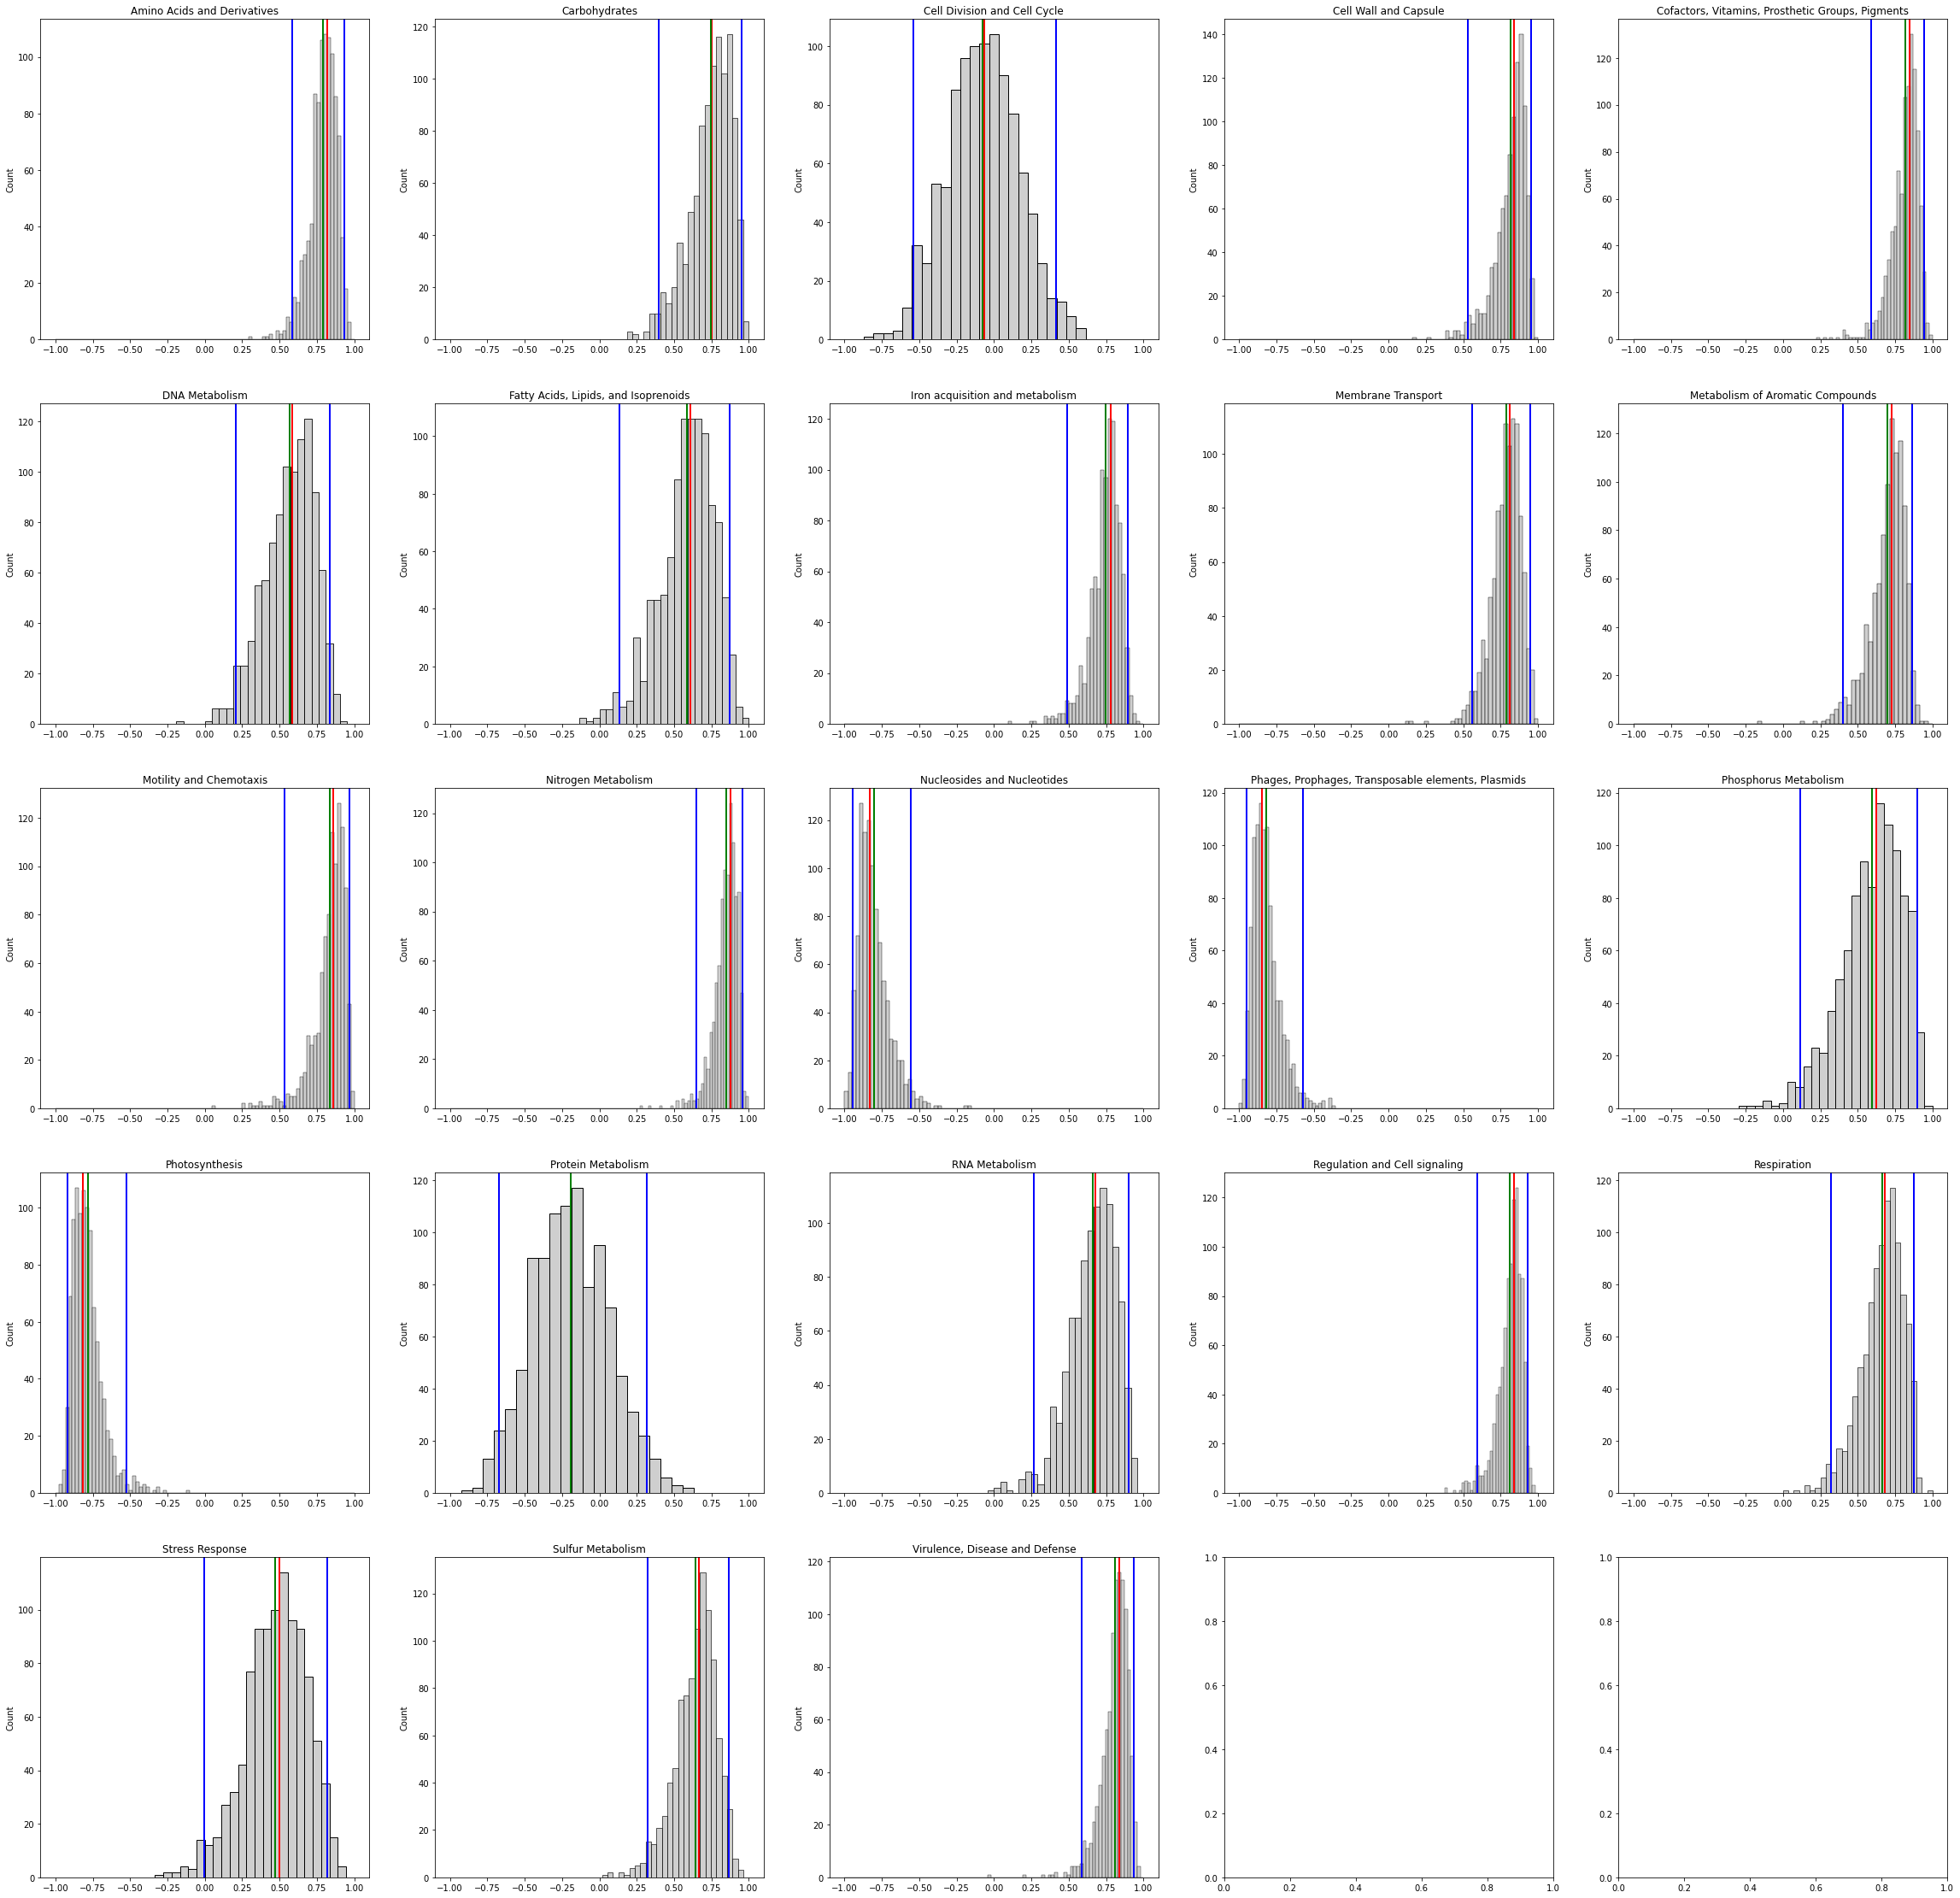

In [ ]:
import statsmodels.stats.api as sms

fig, axs  = plt.subplots(5,5, figsize = (40, 40), facecolor = "white")


row = 0
col = 0

len(dist_new_data.keys())

for key in sorted(dist_new_data.keys()):

    sns.histplot(dist_new_data[key], ax = axs[row,col], color="silver", binrange=(-1,1))
    axs[row,col].set_title(key)
    #axs[row,col].axvline(x = np.mean(rho[key]), color = "red", lw = 2)
    axs[row,col].axvline(x = np.percentile(dist_new_data[key], 2.5),  color = "blue", lw = 2)
    axs[row,col].axvline(x = np.percentile(dist_new_data[key], 97.5),  color = "blue", lw = 2)


    #axs[row,col].axvline(x = observed[observed["Gene"] == key]["Rho"], color = "red", lw = 2)
    axs[row,col].axvline(x = (summary_new_data.at[key, "Observed Mean"]), color = "red", lw = 2)
    axs[row,col].axvline(x = np.mean(dist_new_data[key]), color = "green", lw = 2)

    #axs[row,col].axvline(x = np.mean(sms.DescrStatsW(rho[key]).tconfint_mean()[0]), color = "red")
    #axs[row,col].axvline(x = np.mean(sms.DescrStatsW(rho[key]).tconfint_mean()[1]), color = "red")
    if(col == 4):
        row += 1
        col = 0
    else:
        col +=1

plt.savefig("/Users/jacob/Desktop/Research/Knowles/Meena Bootstrap/New_Data Coral Reef Bootstrap Figure.pdf", transparent = False)

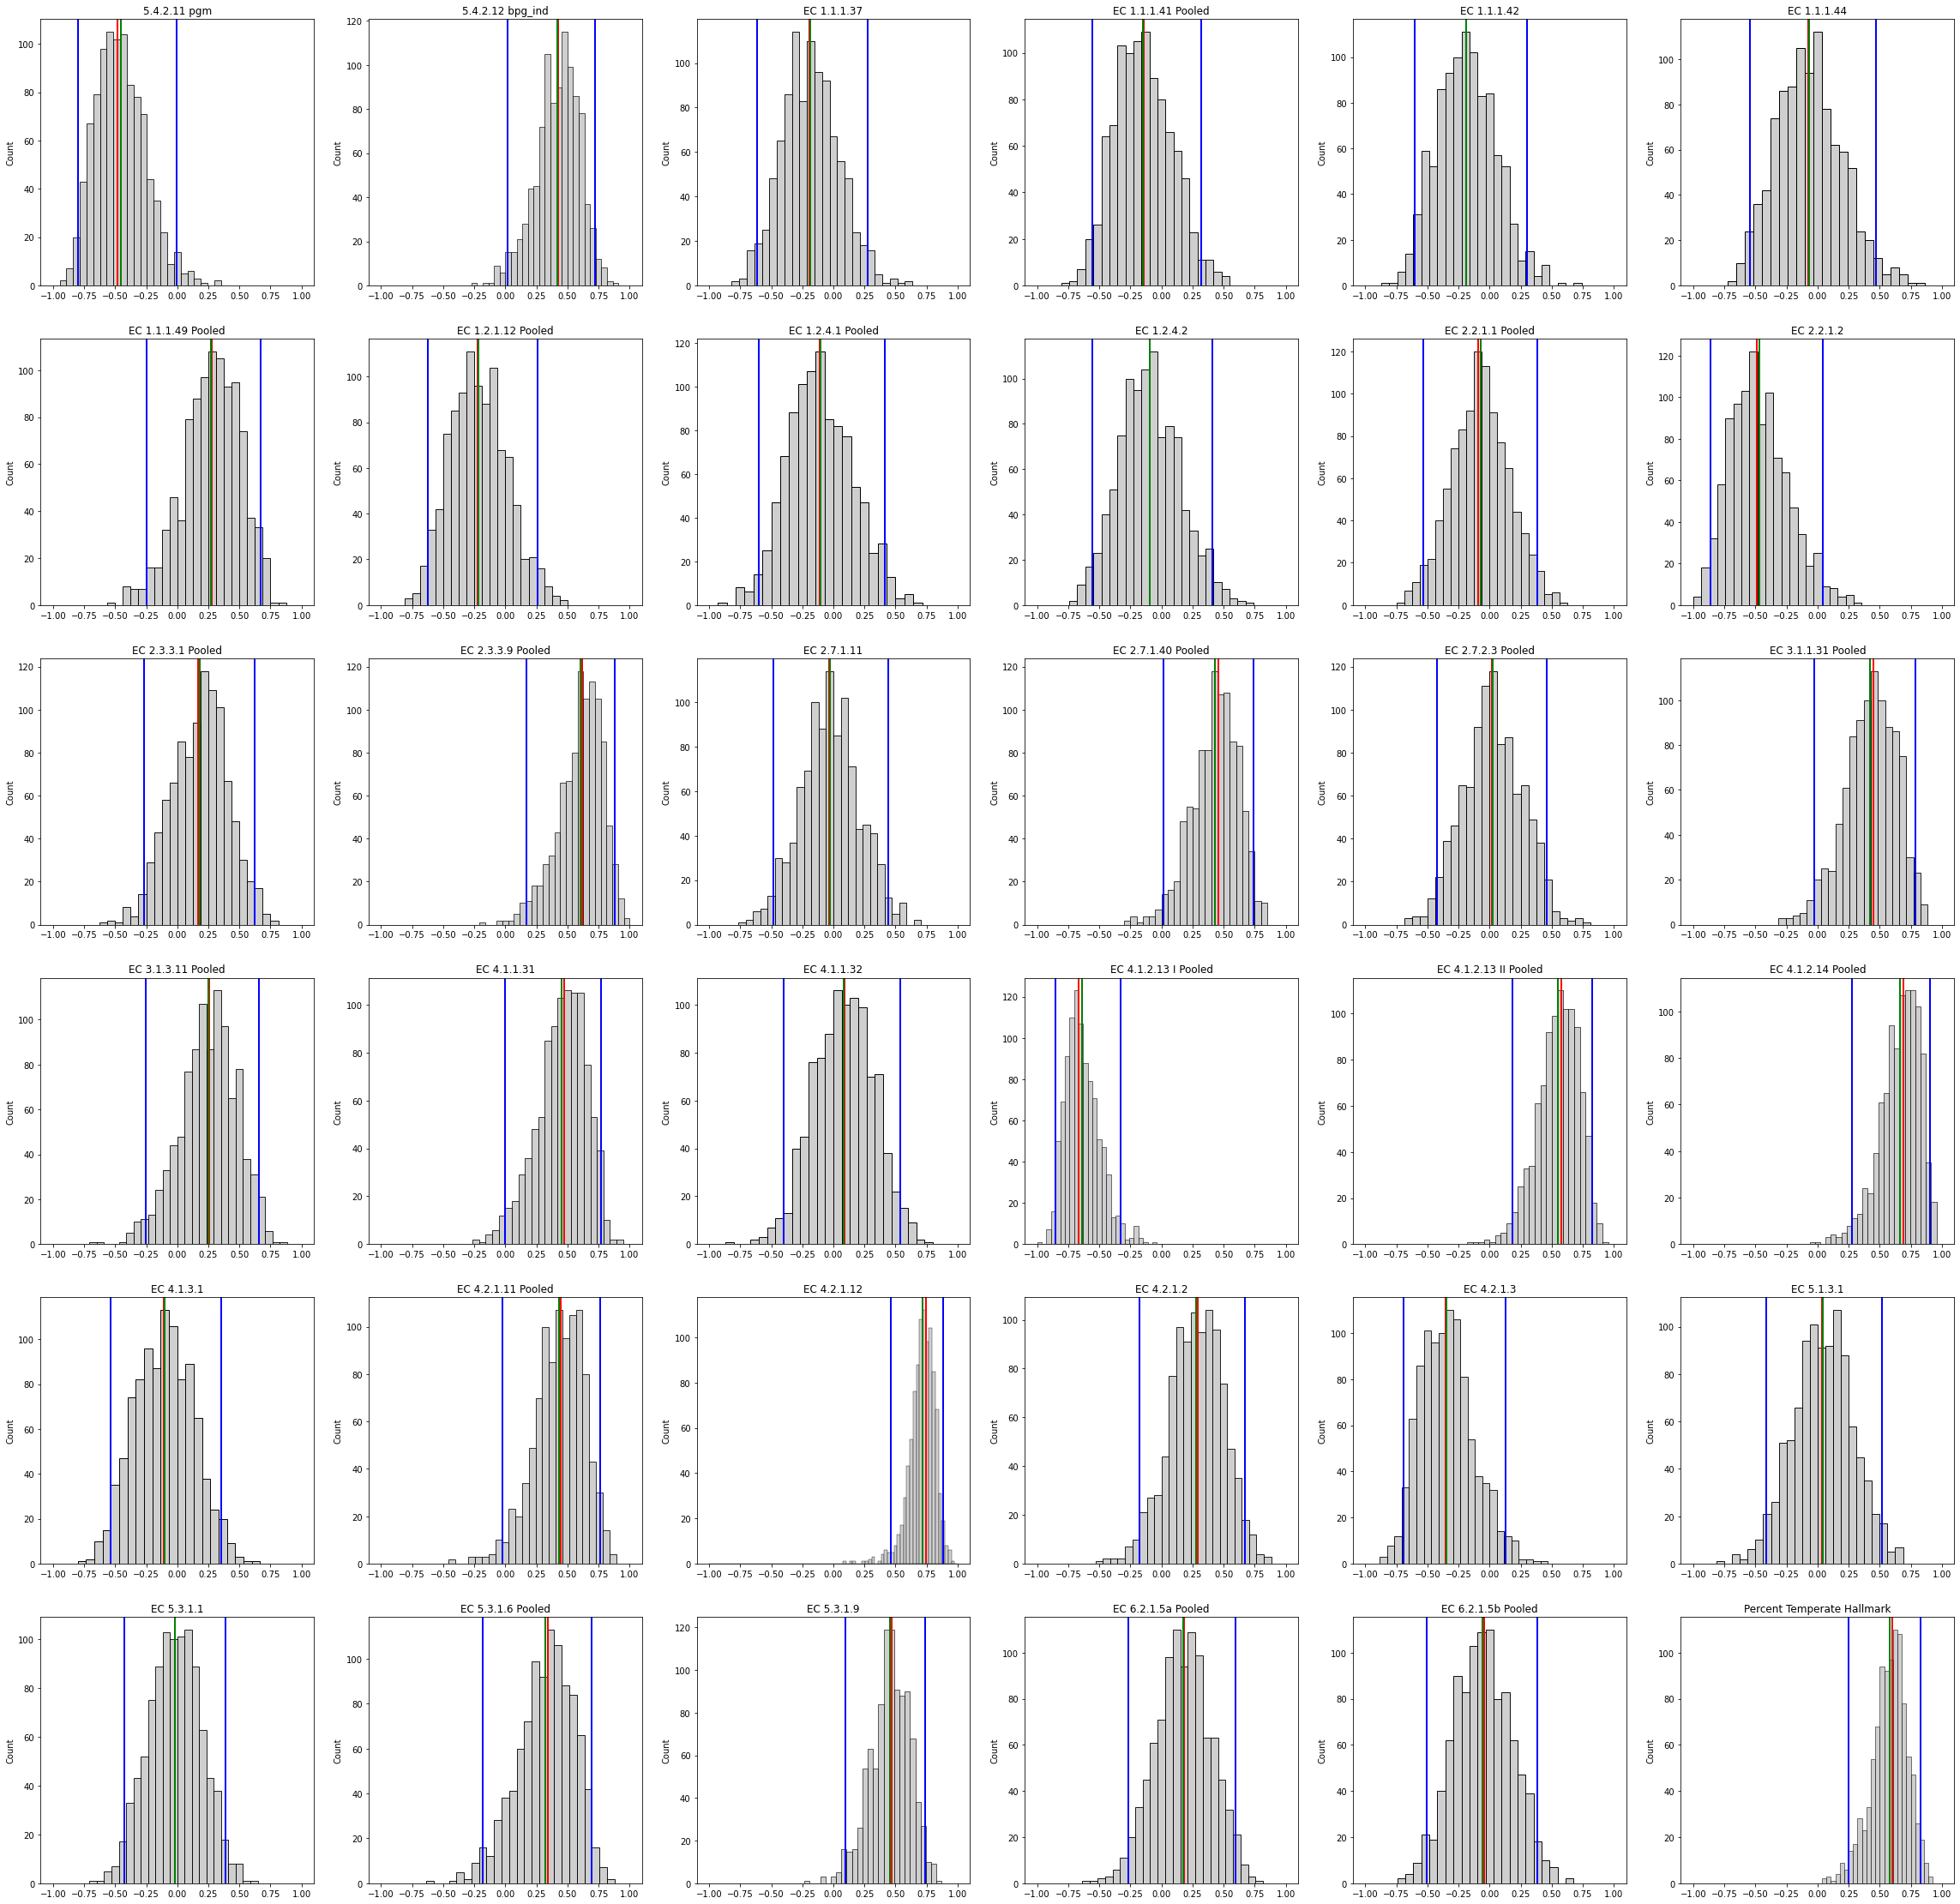

In [ ]:
import statsmodels.stats.api as sms

fig, axs  = plt.subplots(6,6, figsize = (40, 40), facecolor = "white")


row = 0
col = 0

len(dist_observed.keys())

for key in sorted(dist_observed.keys()):

    sns.histplot(dist_observed[key], ax = axs[row,col], color="silver", binrange=(-1,1))
    axs[row,col].set_title(key)
    #axs[row,col].axvline(x = np.mean(rho[key]), color = "red", lw = 2)
    axs[row,col].axvline(x = np.percentile(dist_observed[key], 2.5),  color = "blue", lw = 2)
    axs[row,col].axvline(x = np.percentile(dist_observed[key], 97.5),  color = "blue", lw = 2)


    #axs[row,col].axvline(x = observed[observed["Gene"] == key]["Rho"], color = "red", lw = 2)
    axs[row,col].axvline(x = (summary_observed.at[key, "Observed Mean"]), color = "red", lw = 2)
    axs[row,col].axvline(x = np.mean(dist_observed[key]), color = "green", lw = 2)

    #axs[row,col].axvline(x = np.mean(sms.DescrStatsW(rho[key]).tconfint_mean()[0]), color = "red")
    #axs[row,col].axvline(x = np.mean(sms.DescrStatsW(rho[key]).tconfint_mean()[1]), color = "red")
    if(col == 5):
        row += 1
        col = 0
    else:
        col +=1

plt.savefig("/Users/jacob/Desktop/Research/Knowles/Meena Bootstrap/Genes Coral Reef Bootstrap Figure.pdf", transparent = False)